In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import json
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df=pd.read_csv("training_backup.csv")
df_new=pd.read_csv("testing_backup.csv")

In [ ]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [ ]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

In [ ]:
df.tail()

,lyrics,mood
1477,"[yeah-yeah, yeah-yeah, yeah-yeah, yeah-yeah, y...",1
1478,"[rip, them, down, hold, me, up, tell, them, th...",3
1479,"[it, 's, way, too, late, to, think, of, someon...",4
1480,"[got, no, place, to, go, but, there, 's, a, gi...",2
1481,"[every, light, in, the, night, flicker, in, an...",1


In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

In [ ]:
train_x = df['text_final']
valid_x = df_new['text_final'][:233]
train_y = df['mood']
valid_y = df_new['mood'][:233]

In [ ]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [ ]:
all_texts = []
for items in train_x:
    all_texts.append(items) 
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['god', 'need', 'friend', 'god', 'come', 'end', 'god', 'lose', 'mind', 'god', 'find', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'love', 'felt', 'like', 'hate', 'hate', 'felt', 'like', 'love', 'say', 'fear', 'say', 'scar', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'ca', 'take', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'tell', 'believe', 'tell', 'believe', 'lady', 'gentleman', 'may', 'attention', 'ready', 'joke', 'ready', 'great', 'deception', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe']


In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy,xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

In [ ]:
#tfidf_vect = TfidfVectorizer(analyzer='word',max_features=7000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
#naive bays
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)

accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

NB, Count Vectors:  0.5836909871244635
NB, WordLevel TF-IDF:  0.4592274678111588
NB, N-Gram Vectors:  0.5836909871244635


In [ ]:
from sklearn.svm import LinearSVC
accuracy_count_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy_count_svm)

accuracy_word_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy_word_svm)

accuracy_ngram_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, Ngram Vectors: ", accuracy_ngram_svm)

SVM, Count Vectors:  0.630901287553648
SVM, WordLevel TF-IDF:  0.6523605150214592
SVM, Ngram Vectors:  0.6051502145922747


In [ ]:
import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))
    print(metrics.classification_report(y, clf.predict(X)))
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','relaxed'],
            xticklabels=['happy','sad','angry','relaxed'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    #plt.savefig("rf_tfidf.jpg")
    plt.show()

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        97
           1       0.64      0.69      0.67        68
           2       0.80      0.33      0.47        12
           3       0.51      0.61      0.55        56

    accuracy                           0.65       233
   macro avg       0.68      0.58      0.60       233
weighted avg       0.67      0.65      0.65       233



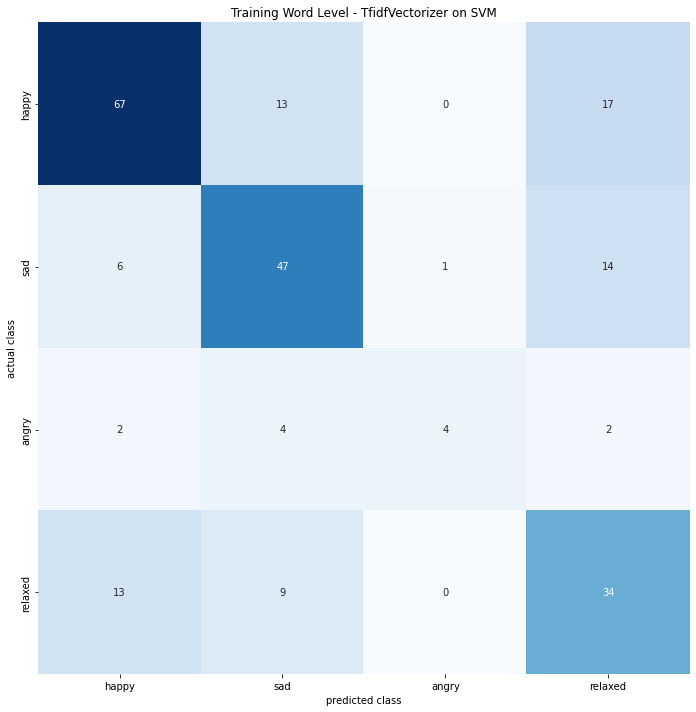

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=svm.LinearSVC(multi_class="ovr")
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on SVM')

In [ ]:
def pred(lyrics):
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")

In [ ]:
pred("Oh-ooh-whoa-oh-oh-oh-oh \nOh-ooh-whoa-oh-oh-oh-oh \nOh-ooh-whoa-oh, oh-oh-oh-oh \nYou know you love me (yo), I know you care (uh-huh) \nJust shout whenever (yo), and I'll be there (uh-huh)")


Tag: Happy
